In [1]:
import numpy as np

with open("./quora.txt", encoding="utf-8") as file:
    data = list(file)

data[50]

"What TV shows or books help you read people's body language?\n"

## One-hot Encoding

In [2]:
from keras.preprocessing.text import Tokenizer
texts = ['The boy is standing on floor.', 'The cat sat on the mat.']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
one_hot_encode = tokenizer.texts_to_matrix(texts,mode = 'binary')
word_index = tokenizer.word_index

In [3]:
def find_common_words(str1,str2):
    word1 = str1.split()
    word2 = str2.split()

    word_freq1 = {}
    word_freq2 = {}
    
    for word in word1:
        word_freq1[word] = word_freq1.get(word, 0) + 1

    
    for word in word2:
        word_freq2[word] = word_freq2.get(word, 0) + 1

    
    common_words = []
    for word in word_freq1:
        if word in word_freq2:
            common_words.append(word)

    return common_words  # Added a colon after common_words


common = find_common_words('The boy is standing on floor', 'The cat sat on the mat')
print(common)

['The', 'on']


In [4]:
one_hot_encode , word_index

(array([[0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 1., 1., 1.]]),
 {'the': 1,
  'on': 2,
  'boy': 3,
  'is': 4,
  'standing': 5,
  'floor': 6,
  'cat': 7,
  'sat': 8,
  'mat': 9})

## Count Vector/ Bag of Words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(texts)

In [6]:
bag_of_words.toarray(), vectorizer.get_feature_names_out()

(array([[1, 0, 1, 1, 0, 1, 0, 1, 1],
        [0, 1, 0, 0, 1, 1, 1, 0, 2]], dtype=int64),
 array(['boy', 'cat', 'floor', 'is', 'mat', 'on', 'sat', 'standing', 'the'],
       dtype=object))

## Tf-IDF:

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer()
tf_idf = tf_vectorizer.fit_transform(texts)
tf_idf.toarray(),tf_vectorizer.get_feature_names_out()

(array([[0.44665616, 0.        , 0.44665616, 0.44665616, 0.        ,
         0.31779954, 0.        , 0.44665616, 0.31779954],
        [0.        , 0.42519636, 0.        , 0.        , 0.42519636,
         0.30253071, 0.42519636, 0.        , 0.60506143]]),
 array(['boy', 'cat', 'floor', 'is', 'mat', 'on', 'sat', 'standing', 'the'],
       dtype=object))

## Word2Vec

In [8]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

## Remove non-alphabetic characters:

In [9]:
brief_cleaning = (re.sub("[''^\w\s']+", ' ', str(row)).lower() for row in data)
new_dataset=list(brief_cleaning)

## As Phrases() takes a list of list of words as input:

In [10]:
from gensim.models.phrases import Phrases, Phraser
phareses_gensim = [row.split() for row in data]   

## Creates the relevant phrases from the list of sentences

In [11]:
phrases = Phrases(phareses_gensim, min_count = 30, progress_per = 10000)

INFO - 12:05:23: collecting all words and their counts
INFO - 12:05:23: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 12:05:23: PROGRESS: at sentence #10000, processed 114552 words and 80148 word types
INFO - 12:05:24: PROGRESS: at sentence #20000, processed 227754 words and 139205 word types
INFO - 12:05:24: PROGRESS: at sentence #30000, processed 341796 words and 192331 word types
INFO - 12:05:24: PROGRESS: at sentence #40000, processed 455362 words and 240904 word types
INFO - 12:05:24: PROGRESS: at sentence #50000, processed 569834 words and 287109 word types
INFO - 12:05:24: PROGRESS: at sentence #60000, processed 683983 words and 331719 word types
INFO - 12:05:25: PROGRESS: at sentence #70000, processed 798539 words and 374238 word types
INFO - 12:05:25: PROGRESS: at sentence #80000, processed 912804 words and 414939 word types
INFO - 12:05:25: PROGRESS: at sentence #90000, processed 1027368 words and 454812 word types
INFO - 12:05:25: PROGRESS: at sentence 

## The goal of Phraser() is to cut down memory consumption of Phrases(), by discarding model state not strictly needed for the bigram detection task:

In [12]:
bigram = Phraser(phrases)
sentences = bigram[phareses_gensim]

INFO - 12:05:35: exporting phrases from Phrases<1723922 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 12:05:38: FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<2466 phrases, min_count=30, threshold=10.0> from Phrases<1723922 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 3.80s', 'datetime': '2024-03-13T12:05:38.850961', 'gensim': '4.1.2', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'created'}


## Most Frequent Words:
Mainly a sanity check of the effectiveness of the lemmatization, removal of stopwords, and addition of bigrams.

In [14]:
word_freq = defaultdict(int)
for words in sentences:
    for i in words:
        word_freq[i] +=1
len(word_freq)

234804

In [15]:
word_freq

defaultdict(int,
            {'Can': 17355,
             'I': 131846,
             'get': 21027,
             'back': 1837,
             'with': 24755,
             'my_ex': 262,
             'even_though': 481,
             'she': 2167,
             'is': 146518,
             'pregnant': 223,
             'another': 1498,
             "guy's": 37,
             'baby?': 96,
             'What': 193068,
             'are_some': 22059,
             'ways': 2122,
             'to': 128395,
             'overcome': 757,
             'a': 152548,
             'fast_food': 75,
             'addiction?': 149,
             'Who': 9900,
             'were': 4409,
             'the': 247478,
             'great': 1377,
             'Chinese': 1210,
             'soldiers': 178,
             'and': 82046,
             'leaders': 120,
             'who': 3936,
             'fought': 81,
             'in': 132517,
             'WW2?': 103,
             'are': 66916,
             'ZIP': 10,
        

In [16]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['the', 'What', 'a', 'is', 'in', 'I', 'to', 'How', 'of', 'do']

## Training the model
Gensim Word2Vec Implementation:
We use Gensim implementation of word2vec:

In [17]:
import multiprocessing

from gensim.models import Word2Vec

**Model Training Is Separated into Three Steps**

1. **Word2Vec Initialization**:
   In the initial step, the parameters of the model are meticulously configured one by one. The parameter sentences are intentionally withheld, leaving the model uninitialized.

2. **Vocabulary Construction with build_vocab()**:
   During this phase, the model constructs its vocabulary from a sequence of sentences, effectively initializing itself. The loggings provide insights into the progress and, more crucially, the impact of `min_count` and `sample` on the word corpus. Notably, these two parameters significantly influence the model's performance. Displaying both values facilitates accurate management of their effects.

3. **Model Training via train()**:
   Finally, the model undergoes training. The log entries serve the primary purpose of monitoring, ensuring that no threads execute instantaneously.



In [18]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

## The parameters:
- min_count = int - Ignores all words with total absolute frequency lower than this - (2, 100)
- window = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)
- vector_size = int - Dimensionality of the feature vectors. - (50, 300)
- sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
- alpha = float - The initial learning rate - (0.01, 0.05)
- min_alpha = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
- negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
- workers = int - Use these many worker threads to train the model (=faster training with multicore machines)

In [19]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

INFO - 12:05:48: Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.03)', 'datetime': '2024-03-13T12:05:48.671055', 'gensim': '4.1.2', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'created'}


## Building the Vocabulary Table:
Word2Vec requires us to build the vocabulary table (simply digesting all the words and filtering out the unique words, and doing some basic counts on them):

In [20]:
t = time()

w2v_model.build_vocab(sentences,progress_per = 1000)

INFO - 12:05:48: collecting all words and their counts
INFO - 12:05:48: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:05:48: PROGRESS: at sentence #1000, processed 10572 words, keeping 3932 word types
INFO - 12:05:48: PROGRESS: at sentence #2000, processed 21691 words, keeping 6909 word types
INFO - 12:05:48: PROGRESS: at sentence #3000, processed 32776 words, keeping 9344 word types
INFO - 12:05:48: PROGRESS: at sentence #4000, processed 43783 words, keeping 11482 word types
INFO - 12:05:48: PROGRESS: at sentence #5000, processed 54196 words, keeping 13339 word types
INFO - 12:05:48: PROGRESS: at sentence #6000, processed 64568 words, keeping 15058 word types
INFO - 12:05:48: PROGRESS: at sentence #7000, processed 75059 words, keeping 16616 word types
INFO - 12:05:48: PROGRESS: at sentence #8000, processed 85677 words, keeping 18179 word types
INFO - 12:05:48: PROGRESS: at sentence #9000, processed 96456 words, keeping 19671 word types
INFO - 12:05:48: PR

INFO - 12:05:50: PROGRESS: at sentence #86000, processed 921343 words, keeping 79803 word types
INFO - 12:05:50: PROGRESS: at sentence #87000, processed 931839 words, keeping 80338 word types
INFO - 12:05:50: PROGRESS: at sentence #88000, processed 942195 words, keeping 80847 word types
INFO - 12:05:50: PROGRESS: at sentence #89000, processed 952713 words, keeping 81374 word types
INFO - 12:05:50: PROGRESS: at sentence #90000, processed 963570 words, keeping 81939 word types
INFO - 12:05:50: PROGRESS: at sentence #91000, processed 974446 words, keeping 82506 word types
INFO - 12:05:50: PROGRESS: at sentence #92000, processed 985138 words, keeping 83011 word types
INFO - 12:05:50: PROGRESS: at sentence #93000, processed 995990 words, keeping 83509 word types
INFO - 12:05:50: PROGRESS: at sentence #94000, processed 1006243 words, keeping 84007 word types
INFO - 12:05:50: PROGRESS: at sentence #95000, processed 1017045 words, keeping 84515 word types
INFO - 12:05:50: PROGRESS: at sentence

INFO - 12:05:51: PROGRESS: at sentence #170000, processed 1820122 words, keeping 119372 word types
INFO - 12:05:51: PROGRESS: at sentence #171000, processed 1830834 words, keeping 119782 word types
INFO - 12:05:51: PROGRESS: at sentence #172000, processed 1841277 words, keeping 120220 word types
INFO - 12:05:52: PROGRESS: at sentence #173000, processed 1851736 words, keeping 120598 word types
INFO - 12:05:52: PROGRESS: at sentence #174000, processed 1862572 words, keeping 121024 word types
INFO - 12:05:52: PROGRESS: at sentence #175000, processed 1873501 words, keeping 121452 word types
INFO - 12:05:52: PROGRESS: at sentence #176000, processed 1884263 words, keeping 121864 word types
INFO - 12:05:52: PROGRESS: at sentence #177000, processed 1894718 words, keeping 122256 word types
INFO - 12:05:52: PROGRESS: at sentence #178000, processed 1905705 words, keeping 122637 word types
INFO - 12:05:52: PROGRESS: at sentence #179000, processed 1916592 words, keeping 123068 word types
INFO - 12:

INFO - 12:05:53: PROGRESS: at sentence #253000, processed 2707442 words, keeping 150752 word types
INFO - 12:05:53: PROGRESS: at sentence #254000, processed 2717887 words, keeping 151091 word types
INFO - 12:05:53: PROGRESS: at sentence #255000, processed 2728669 words, keeping 151433 word types
INFO - 12:05:53: PROGRESS: at sentence #256000, processed 2739182 words, keeping 151798 word types
INFO - 12:05:53: PROGRESS: at sentence #257000, processed 2749878 words, keeping 152130 word types
INFO - 12:05:53: PROGRESS: at sentence #258000, processed 2760865 words, keeping 152492 word types
INFO - 12:05:53: PROGRESS: at sentence #259000, processed 2771697 words, keeping 152871 word types
INFO - 12:05:53: PROGRESS: at sentence #260000, processed 2782522 words, keeping 153214 word types
INFO - 12:05:53: PROGRESS: at sentence #261000, processed 2793507 words, keeping 153580 word types
INFO - 12:05:53: PROGRESS: at sentence #262000, processed 2804011 words, keeping 153927 word types
INFO - 12:

INFO - 12:05:54: PROGRESS: at sentence #336000, processed 3596774 words, keeping 178106 word types
INFO - 12:05:54: PROGRESS: at sentence #337000, processed 3607599 words, keeping 178410 word types
INFO - 12:05:54: PROGRESS: at sentence #338000, processed 3618144 words, keeping 178718 word types
INFO - 12:05:54: PROGRESS: at sentence #339000, processed 3629382 words, keeping 179045 word types
INFO - 12:05:54: PROGRESS: at sentence #340000, processed 3640270 words, keeping 179360 word types
INFO - 12:05:54: PROGRESS: at sentence #341000, processed 3650997 words, keeping 179660 word types
INFO - 12:05:54: PROGRESS: at sentence #342000, processed 3661275 words, keeping 179969 word types
INFO - 12:05:54: PROGRESS: at sentence #343000, processed 3672061 words, keeping 180283 word types
INFO - 12:05:54: PROGRESS: at sentence #344000, processed 3682770 words, keeping 180544 word types
INFO - 12:05:54: PROGRESS: at sentence #345000, processed 3693493 words, keeping 180848 word types
INFO - 12:

INFO - 12:05:56: PROGRESS: at sentence #419000, processed 4484269 words, keeping 202993 word types
INFO - 12:05:56: PROGRESS: at sentence #420000, processed 4494857 words, keeping 203300 word types
INFO - 12:05:56: PROGRESS: at sentence #421000, processed 4505804 words, keeping 203604 word types
INFO - 12:05:56: PROGRESS: at sentence #422000, processed 4516750 words, keeping 203896 word types
INFO - 12:05:56: PROGRESS: at sentence #423000, processed 4527335 words, keeping 204177 word types
INFO - 12:05:56: PROGRESS: at sentence #424000, processed 4537950 words, keeping 204436 word types
INFO - 12:05:56: PROGRESS: at sentence #425000, processed 4548661 words, keeping 204752 word types
INFO - 12:05:56: PROGRESS: at sentence #426000, processed 4559744 words, keeping 205001 word types
INFO - 12:05:56: PROGRESS: at sentence #427000, processed 4570594 words, keeping 205285 word types
INFO - 12:05:56: PROGRESS: at sentence #428000, processed 4581268 words, keeping 205518 word types
INFO - 12:

INFO - 12:05:58: PROGRESS: at sentence #502000, processed 5372928 words, keeping 225570 word types
INFO - 12:05:58: PROGRESS: at sentence #503000, processed 5383481 words, keeping 225847 word types
INFO - 12:05:58: PROGRESS: at sentence #504000, processed 5394217 words, keeping 226123 word types
INFO - 12:05:58: PROGRESS: at sentence #505000, processed 5405158 words, keeping 226433 word types
INFO - 12:05:58: PROGRESS: at sentence #506000, processed 5416085 words, keeping 226712 word types
INFO - 12:05:58: PROGRESS: at sentence #507000, processed 5426731 words, keeping 226994 word types
INFO - 12:05:58: PROGRESS: at sentence #508000, processed 5437135 words, keeping 227234 word types
INFO - 12:05:58: PROGRESS: at sentence #509000, processed 5447757 words, keeping 227493 word types
INFO - 12:05:58: PROGRESS: at sentence #510000, processed 5458122 words, keeping 227765 word types
INFO - 12:05:58: PROGRESS: at sentence #511000, processed 5468783 words, keeping 228029 word types
INFO - 12:

## Training of the model:
Parameters of the training:

1. `total_examples` = int - Count of sentences;
1. `epochs = int` - Number of iterations (epochs) over the corpus - [10, 20, 30]

In [21]:
t=time()

w2v_model.train(sentences,total_examples =w2v_model.corpus_count,epochs=30)

INFO - 12:06:00: Word2Vec lifecycle event {'msg': 'training model with 7 workers on 18610 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2 shrink_windows=True', 'datetime': '2024-03-13T12:06:00.236738', 'gensim': '4.1.2', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'train'}
INFO - 12:06:01: EPOCH 1 - PROGRESS: at 2.26% examples, 34200 words/s, in_qsize 13, out_qsize 0
INFO - 12:06:02: EPOCH 1 - PROGRESS: at 6.62% examples, 60488 words/s, in_qsize 10, out_qsize 5
INFO - 12:06:03: EPOCH 1 - PROGRESS: at 12.52% examples, 82680 words/s, in_qsize 14, out_qsize 0
INFO - 12:06:04: EPOCH 1 - PROGRESS: at 18.59% examples, 96579 words/s, in_qsize 14, out_qsize 0
INFO - 12:06:06: EPOCH 1 - PROGRESS: at 23.63% examples, 99900 words/s, in_qsize 10, out_qsize 3
INFO - 12:06:07: EPOCH 1 - PROGRESS: at 28.85% examples, 103847 words/s, in_qsize 13, out_qsize 0
INFO - 12:06:08: EPOCH 1 - PRO

INFO - 12:07:01: EPOCH 5 - PROGRESS: at 16.33% examples, 192267 words/s, in_qsize 13, out_qsize 0
INFO - 12:07:02: EPOCH 5 - PROGRESS: at 24.16% examples, 188445 words/s, in_qsize 13, out_qsize 0
INFO - 12:07:03: EPOCH 5 - PROGRESS: at 28.32% examples, 166326 words/s, in_qsize 12, out_qsize 2
INFO - 12:07:04: EPOCH 5 - PROGRESS: at 37.88% examples, 179221 words/s, in_qsize 14, out_qsize 0
INFO - 12:07:05: EPOCH 5 - PROGRESS: at 43.96% examples, 168678 words/s, in_qsize 13, out_qsize 0
INFO - 12:07:06: EPOCH 5 - PROGRESS: at 53.19% examples, 175895 words/s, in_qsize 13, out_qsize 6
INFO - 12:07:07: EPOCH 5 - PROGRESS: at 62.38% examples, 181048 words/s, in_qsize 14, out_qsize 0
INFO - 12:07:08: EPOCH 5 - PROGRESS: at 71.26% examples, 183955 words/s, in_qsize 13, out_qsize 2
INFO - 12:07:09: EPOCH 5 - PROGRESS: at 80.11% examples, 186987 words/s, in_qsize 13, out_qsize 0
INFO - 12:07:10: EPOCH 5 - PROGRESS: at 89.84% examples, 191107 words/s, in_qsize 10, out_qsize 1
INFO - 12:07:11: EPO

INFO - 12:08:03: worker thread finished; awaiting finish of 5 more threads
INFO - 12:08:03: worker thread finished; awaiting finish of 4 more threads
INFO - 12:08:03: worker thread finished; awaiting finish of 3 more threads
INFO - 12:08:03: worker thread finished; awaiting finish of 2 more threads
INFO - 12:08:03: worker thread finished; awaiting finish of 1 more threads
INFO - 12:08:03: worker thread finished; awaiting finish of 0 more threads
INFO - 12:08:03: EPOCH - 9 : training on 5749074 raw words (2436837 effective words) took 12.3s, 197811 effective words/s
INFO - 12:08:04: EPOCH 10 - PROGRESS: at 7.49% examples, 171646 words/s, in_qsize 13, out_qsize 0
INFO - 12:08:05: EPOCH 10 - PROGRESS: at 16.68% examples, 189958 words/s, in_qsize 13, out_qsize 1
INFO - 12:08:06: EPOCH 10 - PROGRESS: at 26.06% examples, 200954 words/s, in_qsize 10, out_qsize 3
INFO - 12:08:07: EPOCH 10 - PROGRESS: at 35.62% examples, 204651 words/s, in_qsize 13, out_qsize 0
INFO - 12:08:08: EPOCH 10 - PROGR

INFO - 12:09:01: EPOCH 14 - PROGRESS: at 16.32% examples, 192372 words/s, in_qsize 11, out_qsize 2
INFO - 12:09:02: EPOCH 14 - PROGRESS: at 25.02% examples, 196100 words/s, in_qsize 11, out_qsize 3
INFO - 12:09:03: EPOCH 14 - PROGRESS: at 30.57% examples, 180990 words/s, in_qsize 14, out_qsize 0
INFO - 12:09:04: EPOCH 14 - PROGRESS: at 39.62% examples, 186358 words/s, in_qsize 13, out_qsize 0
INFO - 12:09:05: EPOCH 14 - PROGRESS: at 48.15% examples, 188967 words/s, in_qsize 14, out_qsize 0
INFO - 12:09:06: EPOCH 14 - PROGRESS: at 55.43% examples, 184442 words/s, in_qsize 10, out_qsize 5
INFO - 12:09:07: EPOCH 14 - PROGRESS: at 63.94% examples, 186507 words/s, in_qsize 14, out_qsize 0
INFO - 12:09:08: EPOCH 14 - PROGRESS: at 69.69% examples, 180393 words/s, in_qsize 13, out_qsize 0
INFO - 12:09:10: EPOCH 14 - PROGRESS: at 77.69% examples, 175939 words/s, in_qsize 11, out_qsize 2
INFO - 12:09:11: EPOCH 14 - PROGRESS: at 86.71% examples, 179706 words/s, in_qsize 13, out_qsize 1
INFO - 12:

INFO - 12:10:04: EPOCH 18 - PROGRESS: at 66.55% examples, 182837 words/s, in_qsize 13, out_qsize 0
INFO - 12:10:05: EPOCH 18 - PROGRESS: at 71.09% examples, 175437 words/s, in_qsize 12, out_qsize 4
INFO - 12:10:06: EPOCH 18 - PROGRESS: at 79.77% examples, 178606 words/s, in_qsize 11, out_qsize 2
INFO - 12:10:07: EPOCH 18 - PROGRESS: at 86.71% examples, 177157 words/s, in_qsize 13, out_qsize 0
INFO - 12:10:08: EPOCH 18 - PROGRESS: at 94.89% examples, 178468 words/s, in_qsize 14, out_qsize 0
INFO - 12:10:09: worker thread finished; awaiting finish of 6 more threads
INFO - 12:10:09: worker thread finished; awaiting finish of 5 more threads
INFO - 12:10:09: worker thread finished; awaiting finish of 4 more threads
INFO - 12:10:09: worker thread finished; awaiting finish of 3 more threads
INFO - 12:10:09: worker thread finished; awaiting finish of 2 more threads
INFO - 12:10:09: worker thread finished; awaiting finish of 1 more threads
INFO - 12:10:09: worker thread finished; awaiting finis

INFO - 12:11:07: worker thread finished; awaiting finish of 6 more threads
INFO - 12:11:07: worker thread finished; awaiting finish of 5 more threads
INFO - 12:11:07: worker thread finished; awaiting finish of 4 more threads
INFO - 12:11:07: worker thread finished; awaiting finish of 3 more threads
INFO - 12:11:07: worker thread finished; awaiting finish of 2 more threads
INFO - 12:11:07: worker thread finished; awaiting finish of 1 more threads
INFO - 12:11:07: worker thread finished; awaiting finish of 0 more threads
INFO - 12:11:07: EPOCH - 22 : training on 5749074 raw words (2436836 effective words) took 12.5s, 195366 effective words/s
INFO - 12:11:08: EPOCH 23 - PROGRESS: at 5.57% examples, 135039 words/s, in_qsize 13, out_qsize 0
INFO - 12:11:09: EPOCH 23 - PROGRESS: at 13.21% examples, 139542 words/s, in_qsize 10, out_qsize 5
INFO - 12:11:10: EPOCH 23 - PROGRESS: at 20.33% examples, 142318 words/s, in_qsize 11, out_qsize 5
INFO - 12:11:11: EPOCH 23 - PROGRESS: at 26.41% examples

INFO - 12:12:05: EPOCH 27 - PROGRESS: at 45.35% examples, 147006 words/s, in_qsize 13, out_qsize 3
INFO - 12:12:06: EPOCH 27 - PROGRESS: at 50.04% examples, 143000 words/s, in_qsize 13, out_qsize 0
INFO - 12:12:07: EPOCH 27 - PROGRESS: at 55.60% examples, 140424 words/s, in_qsize 11, out_qsize 2
INFO - 12:12:08: EPOCH 27 - PROGRESS: at 57.69% examples, 129123 words/s, in_qsize 10, out_qsize 3
INFO - 12:12:10: EPOCH 27 - PROGRESS: at 63.58% examples, 129343 words/s, in_qsize 12, out_qsize 1
INFO - 12:12:11: EPOCH 27 - PROGRESS: at 72.31% examples, 135516 words/s, in_qsize 11, out_qsize 3
INFO - 12:12:12: EPOCH 27 - PROGRESS: at 81.86% examples, 142091 words/s, in_qsize 13, out_qsize 1
INFO - 12:12:13: EPOCH 27 - PROGRESS: at 92.10% examples, 148356 words/s, in_qsize 13, out_qsize 5
INFO - 12:12:13: worker thread finished; awaiting finish of 6 more threads
INFO - 12:12:13: worker thread finished; awaiting finish of 5 more threads
INFO - 12:12:13: worker thread finished; awaiting finish o

(73106258, 172472220)

## Exploring the model



In [27]:
w2v_model.wv.most_similar(positive=["TV"])

[('tv', 0.6247472763061523),
 ('tv?', 0.577173113822937),
 ('TV?', 0.5722952485084534),
 ('television', 0.4967595636844635),
 ('TV,', 0.4932209253311157),
 ('Vizio', 0.4897327423095703),
 ('television?', 0.48529165983200073),
 ('serials', 0.4312916398048401),
 ('TV_shows', 0.4246923625469208),
 ('Roku?', 0.414254367351532)]

In [23]:
w2v_model.wv.most_similar(positive=["cinema",'TV'], negative=["read"])

[('tv', 0.4898397624492645),
 ('television?', 0.4484670162200928),
 ('Bollywood_movies?', 0.4262617230415344),
 ('serials', 0.42320072650909424),
 ('television', 0.41607189178466797),
 ('dramas?', 0.4121333062648773),
 ('TV?', 0.4114305377006531),
 ('Comedy', 0.40199604630470276),
 ('dramas', 0.3867979049682617),
 ('theater?', 0.38558313250541687)]

## t-SNE visualizations:

t-SNE is a non-linear dimensionality reduction algorithm that attempts to represent high-dimensional data and the underlying relationships between vectors in a lower-dimensional space.

Our goal in this section is to plot our 300 dimensions vectors into 2 dimensional graphs, and see if we can spot interesting patterns.
For that we are going to use t-SNE implementation from scikit-learn.

To make the visualizations more relevant, we will look at the relationships between a query word (in **red**), its most similar words in the model (in **blue**), and other words from the vocabulary (in **green**).

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [25]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 21 dimensions with PCA
    reduc = PCA(n_components=17).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))


C:\Users\Dipti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Dipti\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


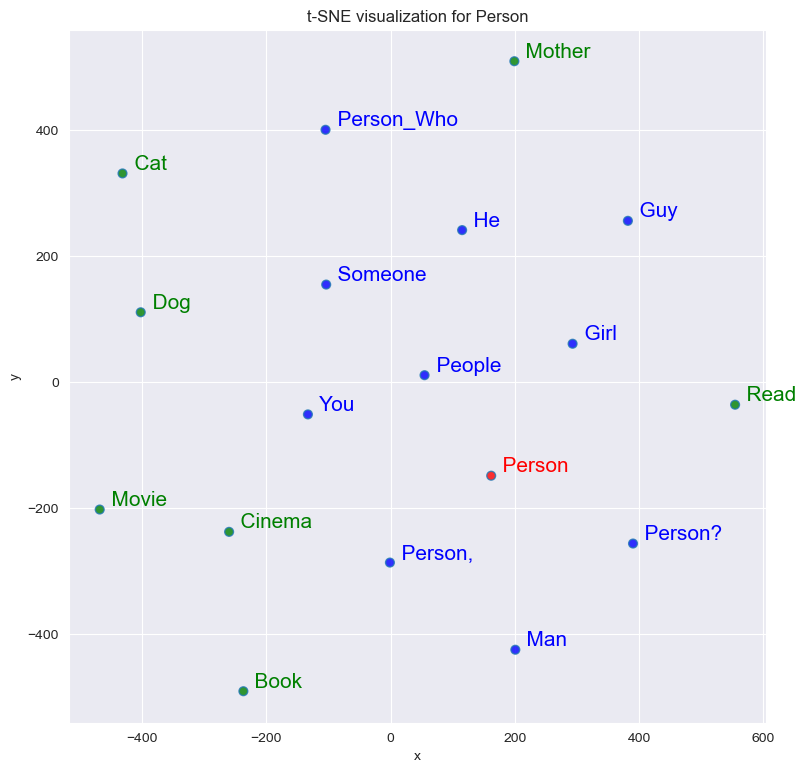

In [26]:
tsnescatterplot(w2v_model, 'person', ['cinema', 'read', 'dog', 'cat', 'movie', 'book','mother'])